# ESG Ratings and Grades
## Can I use a company's ESG score to determine whether or not I should invest in a company?

---
This notebook contains the bulk of our analysis. First, we look through our initial dataset and explore what's there. and answer the following questions:

*What are the top scoring ESG companies, and what are the top scoring industries by average total ESG score?

*How do the comapnies in our initial dataset breakdown by ESG total grade?


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress



# data file paths, including both original and cleaned/updated dataset
original_esg_data_path = "csv_files/data.csv"
esg_complete_path = "csv_files/esg_complete.csv"


# Converting csv to dataframe
esg_data = pd.read_csv(original_esg_data_path)
esg_complete = pd.read_csv(esg_complete_path)

# Displaying the original kaggle dataset for preview
esg_data.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258


# Top 10 Companies by Total ESG Score

In [2]:
#Sorting the original dataframe by ESG total score and showing the top 10 results

top_companies = esg_data.sort_values("total_score", ascending=False)
top_companies_visual = top_companies[['ticker', 'name', 'industry', 'environment_score', 'governance_score', 'social_score', 'total_score', 'total_grade']]
top_companies_visual.reset_index(inplace=True)
top_companies_visual.head(10)

,index,ticker,name,industry,environment_score,governance_score,social_score,total_score,total_grade
0,452,cop,Conocophillips,Energy,687,305,544,1536,A
1,176,msft,Microsoft Corp,Technology,715,375,443,1533,A
2,302,eix,Edison International,Utilities,700,315,513,1528,A
3,18,abnb,Airbnb Inc,Hotels Restaurants and Leisure,505,400,570,1475,A
4,250,apd,Air Products and Chemicals Inc,Chemicals,700,300,442,1442,A
5,137,amzn,Amazon.com Inc,Retail,668,460,305,1433,A
6,487,nem,Newmont Corporation,Metals and Mining,675,355,389,1419,A
7,195,pep,PepsiCo Inc,Beverages,719,358,340,1417,A
8,494,exc,Exelon Corp,Utilities,694,316,403,1413,A
9,372,pxd,Pioneer Natural Resources Co,Energy,700,300,412,1412,A


In [3]:
# Dataframe Groupby "Industry" and ran .agg to gather statistics by industry
esg_industry_agg = esg_data.groupby(["industry"])["total_score"].agg(("mean", "median", "var", "std", "sem"))
esg_industry_counts = esg_data.groupby(["industry"])["total_score"].value_counts()
esg_industry_agg["# of companies"] = esg_data.groupby(["industry"])["total_score"].count()
esg_industry_agg

,mean,median,var,std,sem,# of companies
industry,,,,,,
Aerospace & Defense,633.000000,633.0,NaN,NaN,NaN,1
Aerospace and Defense,1089.700000,1136.0,24886.011111,157.753007,49.885881,10
Airlines,838.714286,746.0,36032.904762,189.823351,71.746483,7
Auto Components,833.333333,696.0,105349.333333,324.575620,187.393822,3
Automobiles,859.250000,873.0,42856.250000,207.017511,103.508756,4
Banking,898.310345,886.0,33559.507389,183.192542,34.018001,29
Beverages,1061.000000,1113.0,115992.000000,340.575983,170.287991,4
Biotechnology,866.910714,822.5,31003.610065,176.078420,23.529469,56
Building,1074.200000,1123.5,40144.400000,200.360675,63.359609,10


# Top Industries by Average Total ESG Score

In [4]:
#Sorting by Average (mean) total ESG Score
esg_stats_sorted = esg_industry_agg.sort_values("mean", ascending=False)
esg_stats_sorted

,mean,median,var,std,sem,# of companies
industry,,,,,,
Utilities,1190.633333,1199.5,35381.067816,188.098559,34.341941,30
Tobacco,1165.000000,1165.0,18.000000,4.242641,3.000000,2
Industrial Conglomerates,1157.000000,1141.0,1216.000000,34.871192,20.132892,3
Packaging,1156.000000,1157.0,2290.000000,47.853944,23.926972,4
Energy,1142.263158,1151.0,46887.204678,216.534535,49.676429,19
Food Products,1131.071429,1127.0,9614.994505,98.056078,26.206589,14
Distributors,1109.666667,1120.0,1640.333333,40.501029,23.383280,3
Aerospace and Defense,1089.700000,1136.0,24886.011111,157.753007,49.885881,10
Construction,1082.666667,1187.5,61952.666667,248.902926,101.614194,6


In [5]:
#Note for presentation we removed industries with less than 10 companies for a cleaner visual

esg_stats_refined = esg_stats_sorted[(esg_stats_sorted["# of companies"]>=10)]
esg_stats_refined.head(10)

,mean,median,var,std,sem,# of companies
industry,,,,,,
Utilities,1190.633333,1199.5,35381.067816,188.098559,34.341941,30
Energy,1142.263158,1151.0,46887.204678,216.534535,49.676429,19
Food Products,1131.071429,1127.0,9614.994505,98.056078,26.206589,14
Aerospace and Defense,1089.700000,1136.0,24886.011111,157.753007,49.885881,10
Building,1074.200000,1123.5,40144.400000,200.360675,63.359609,10
Chemicals,1058.894737,1132.0,55246.654971,235.046070,53.923267,19
Machinery,1048.047619,1125.0,29579.647619,171.987347,37.530716,21
Technology,1031.317460,1103.0,38448.639529,196.083246,24.704167,63
Semiconductors,1030.583333,1100.0,27034.862319,164.422816,33.562667,24


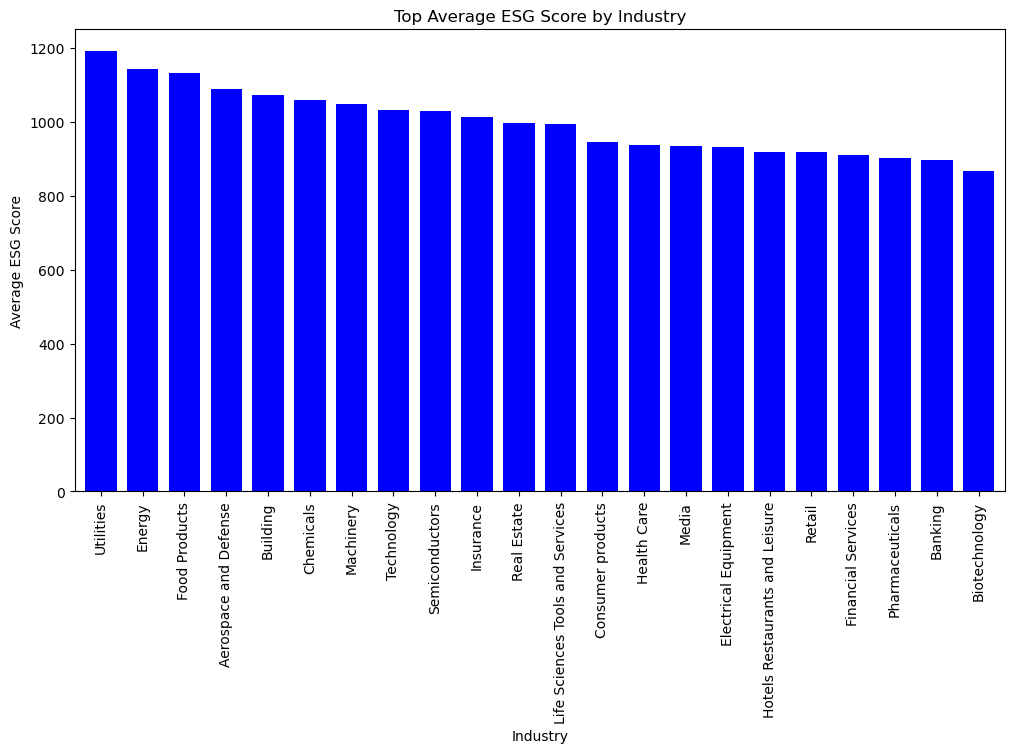

In [6]:
avg_ESG_score_industry = esg_stats_refined["mean"]

avg_esg = avg_ESG_score_industry.plot(kind="bar", facecolor="blue", width=.75,
                                                  title="Top Average ESG Score by Industry",
                                                  figsize=(12,6),
                                                  xlabel="Industry",
                                                  ylabel="Average ESG Score")

plt.savefig("Images/Top Average ESG Score by Industry.png")

# Breakdown of All Companies by ESG Total Grade and Environmental Grade

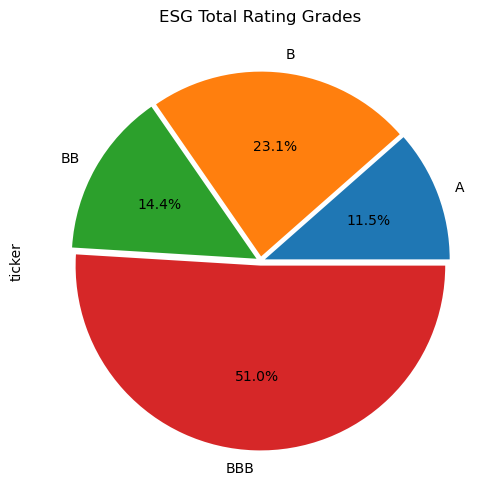

In [7]:
esg_total_grades = esg_data.groupby(["total_grade"])["ticker"].count()
esg_total_grades_pie = esg_total_grades.plot(kind="pie", autopct='%1.1f%%', explode=[0.025, 0.025, 0.025, 0.025],
                                                  figsize=(12,6), title="ESG Total Rating Grades")
plt.savefig("Images/ESG Total Rating Grades Pie Chart.png")

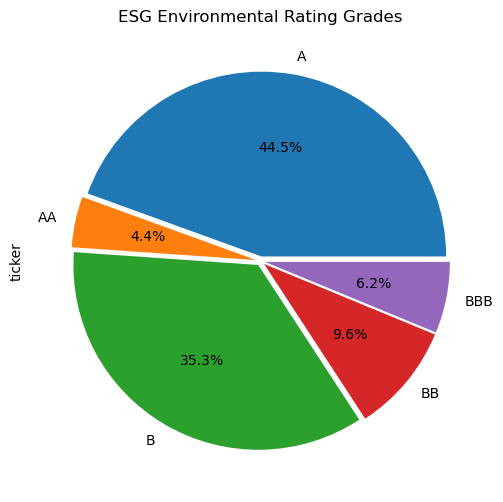

In [8]:
esg_enviro_grades = esg_data.groupby(["environment_grade"])["ticker"].count()
esg_enviro_grades_pie = esg_enviro_grades.plot(kind="pie", autopct='%1.1f%%', explode=[0.025, 0.025, 0.025, 0.025, 0.025],
                                                  figsize=(12,6), title="ESG Environmental Rating Grades")


    
 
                                      

# Analysis

After completing some initial exploration of our original dataset, we bring in our cleaned dataset created in the data_clean notebook for our main analysis

We aim to answer the following questions: 

*Based solely on ESG total score, is there a positive and meaningful correlation between 5 year annualized change in stock price?

*Based solely on ESG total score, is there a positive and meaningful correlation between earnings per share (EPS)

To answer this, we first plotted each companies Total ESG score vs. our two key metrics

# Scatterplots of ESG Total Score vs. Key Metrics

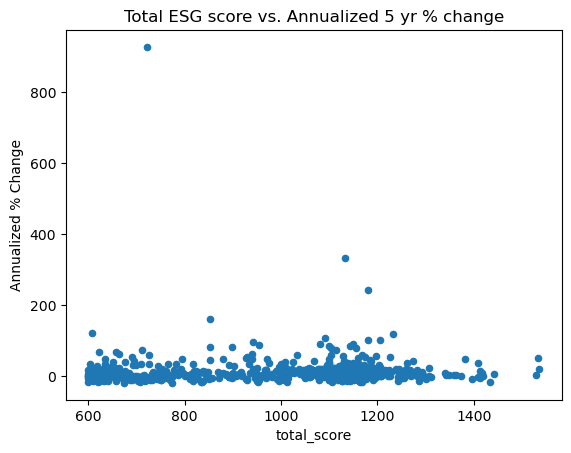

In [9]:
# Build scatter plot for Total ESG score vs. Annualized 5 yr % change
esg_complete.plot(kind="scatter", x="total_score", y="Annualized % Change", title="Total ESG score vs. Annualized 5 yr % change")


# Save the figure
plt.savefig("Images/Total ESG score vs. Annualized 5 yr % change(with OUTLIERS).png")

# Show plot
plt.show()

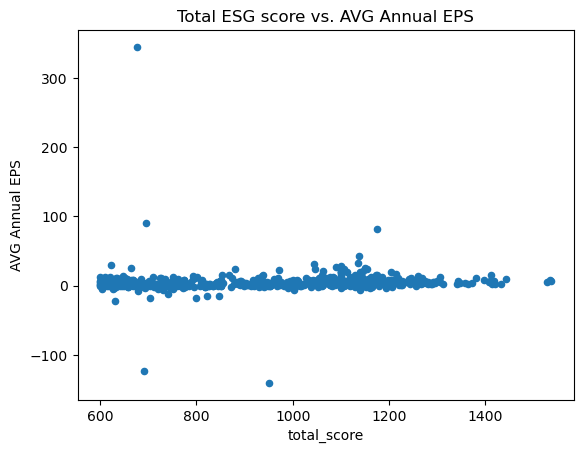

In [10]:
# Build scatter plot for Total ESG score vs. Annualized 5 yr % change
esg_complete.plot(kind="scatter", x="total_score", y="AVG Annual EPS", title="Total ESG score vs. AVG Annual EPS")


# Save the figure
plt.savefig("Images/Total ESG score vs. AVG Annual EPS(with OUTLIERS).png")

# Show plot
plt.show()

# Box plots of ESG Total Score vs. Key Metrics

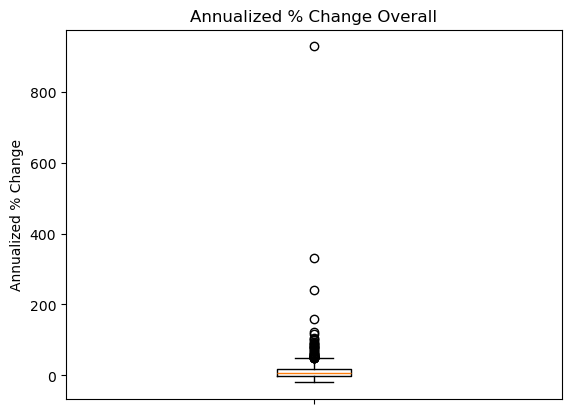

In [11]:
perc_change_series= pd.DataFrame(esg_complete["Annualized % Change"])

# Create a boxplot for the data
plt.boxplot(perc_change_series)

# Add labels to the x-axis
plt.xticks([1], [''])

# Add a title and labels
plt.title('Annualized % Change Overall')
plt.ylabel('Annualized % Change')

plt.savefig("Images/Annualized % Change Overall(with OUTLIERS)BOX.png")

# Show the plot
plt.show()

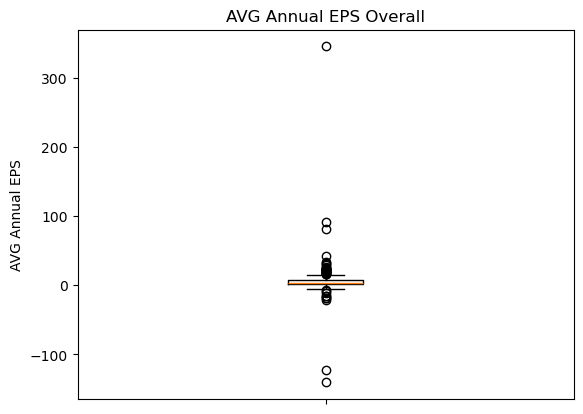

In [12]:
eps_series= pd.DataFrame(esg_complete["AVG Annual EPS"])

# Create a boxplot for the data
plt.boxplot(eps_series)

# Add labels to the x-axis
plt.xticks([1], [""])

# Add a title and labels
plt.title('AVG Annual EPS Overall')
plt.ylabel('AVG Annual EPS')

plt.savefig("Images/AVG ANNUAL EPS Overall(with OUTLIERS)BOX.png")

# Show the plot
plt.show()

# Elimination of outliers

Based on both the scatter and box plots above we can very easily see that there are a few outliers that are skewing the data significantly.

Next, we look to eliminate the outliers for each key metrics in question. Afterwards, we re-ran the box plots for each.

In [13]:
# Calculating the quartiles and upper and lower bounds
perc_change_series= pd.DataFrame(esg_complete["Annualized % Change"])

quartiles = perc_change_series.quantile([.25,.5,.75])
lowerq = perc_change_series.quantile([.25])
upperq = perc_change_series.quantile([.75])

print(lowerq)
print(upperq)

      Annualized % Change
0.25            -1.944722
      Annualized % Change
0.75            18.001204


In [14]:
lowerq = -2.039333
upperq = 17.905116

iqr = upperq-lowerq
iqr
lower_bound = lowerq - (1.5*iqr)
lower_bound
upper_bound = upperq + (1.5*iqr)
upper_bound

# Using the bounds to identify outlier values
outliers = esg_complete[((esg_complete["Annualized % Change"])<=lower_bound)|((esg_complete["Annualized % Change"])>upper_bound)]


outliers["ticker"]


15     abio
22     acls
40     aehr
52     agys
67     alim
72     amat
73      amd
74     avgo
81     cdns
93     ctas
105    lrcx
110    mrna
112    mpwr
113    msft
118    nvda
140    snps
180     amp
208      bx
215     dhi
220     cmg
237     etn
251     mck
274     nue
279     phm
292     pwr
341     uri
356     wst
397     len
418    enph
442     fcx
451     lly
474     hwm
476      ge
498    pmcb
518    mtsi
525    clsk
536    poai
550    powl
552    usau
563     cmc
564    uslm
575      fn
586    hubs
Name: ticker, dtype: object

In [15]:
# Removing the outlier values from the dataset
perc_change_wo_outliers = esg_complete[esg_complete['ticker'].isin(outliers["ticker"]) == False]
perc_change_wo_outliers

,Unnamed: 0,ticker,5 YR Open,5 YR Close,Percentage Change,Annualized % Change,eps 2019,eps 2020,eps 2021,eps 2022,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,0,dis,111.03,122.36,10.204449,2.040890,5.87,2.01,2.28,3.53,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,1,gm,37.10,45.35,22.237197,4.447439,4.30,4.88,7.09,7.60,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,2,gww,300.93,1017.30,238.052039,47.610408,17.29,16.17,19.84,29.67,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,3,mhk,126.15,130.89,3.757432,0.751486,10.02,8.83,14.84,12.85,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,4,lyv,63.54,105.77,66.462071,13.292414,-0.07,-8.10,-3.01,0.79,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,592,hae,87.48,85.35,-2.434842,-0.486968,2.39,3.31,2.35,2.59,...,BB,Medium,448,303,305,1056,07-11-2022,BBB,High,313143
584,593,hgv,30.85,47.21,53.030794,10.606159,2.43,0.44,1.55,2.94,...,B,Medium,305,288,250,843,15-11-2022,BB,Medium,1674168
585,594,hi,41.53,50.29,21.093186,4.218637,2.45,2.57,3.79,3.92,...,BB,Medium,489,349,300,1138,07-11-2022,BBB,High,1417398
587,597,hesm,21.20,36.13,70.424528,14.084906,1.22,1.31,1.76,2.01,...,B,Medium,307,257,255,819,15-11-2022,BB,Medium,1789832


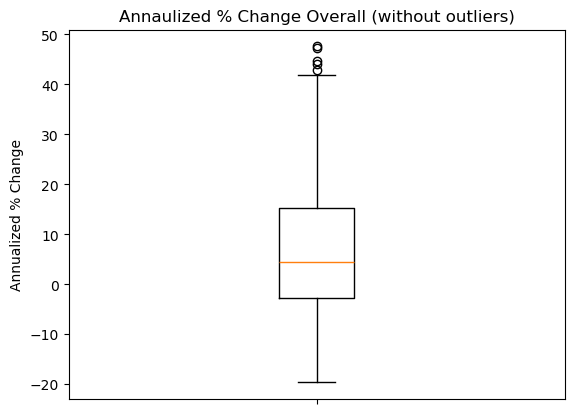

In [16]:
perc_change_series_wo_outliers= pd.DataFrame(perc_change_wo_outliers["Annualized % Change"])

# Create a boxplot for the data
plt.boxplot(perc_change_series_wo_outliers)

# Add labels to the x-axis
plt.xticks([1], [''])

# Add a title and labels
plt.title('Annaulized % Change Overall (without outliers)')
plt.ylabel('Annualized % Change')

plt.savefig("Images/Annualized % Change Overall(without OUTLIERS)BOX.png")

# Show the plot
plt.show()

In [17]:
# Calculating the quartiles and upper and lower bounds
eps_series = pd.DataFrame(esg_complete["AVG Annual EPS"])

quartiles = eps_series.quantile([.25,.5,.75])
lowerq = eps_series.quantile([.25])
upperq = eps_series.quantile([.75])

print(lowerq)
print(upperq)

      AVG Annual EPS
0.25           1.536
      AVG Annual EPS
0.75           7.072


In [18]:
lowerq = 1.536
upperq = 7.072

iqr = upperq-lowerq
iqr
lower_bound = lowerq - (1.5*iqr)
lower_bound
upper_bound = upperq + (1.5*iqr)
upper_bound

# Using the bounds to identify outlier values
eps_outliers = esg_complete[((esg_complete["AVG Annual EPS"])<=lower_bound)|((esg_complete["AVG Annual EPS"])>upper_bound)]


eps_outliers["ticker"]

2       gww
14     abeo
24     achv
26     acor
41     aehl
51     agrx
69     alny
74     avgo
79     biib
80     bkng
85     chtr
105    lrcx
124    orly
138    regn
139    amgn
180     amp
194      ba
206     azo
220     cmg
235      gs
251     mck
266     mtd
272     noc
274     nue
276     nvr
280      ph
304     tdg
330     tmo
335     unh
341     uri
355     whr
367      de
389      ci
413     fdx
416     lmt
473     hum
492    ship
517    mymd
560    uxin
Name: ticker, dtype: object

In [19]:
# Removing the outlier values from the dataset
eps_wo_outliers = esg_complete[esg_complete['ticker'].isin(eps_outliers["ticker"]) == False]
eps_wo_outliers

,Unnamed: 0,ticker,5 YR Open,5 YR Close,Percentage Change,Annualized % Change,eps 2019,eps 2020,eps 2021,eps 2022,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,0,dis,111.03,122.36,10.204449,2.040890,5.87,2.01,2.28,3.53,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,1,gm,37.10,45.35,22.237197,4.447439,4.30,4.88,7.09,7.60,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
3,3,mhk,126.15,130.89,3.757432,0.751486,10.02,8.83,14.84,12.85,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,4,lyv,63.54,105.77,66.462071,13.292414,-0.07,-8.10,-3.01,0.79,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258
5,5,lvs,60.96,51.70,-15.190289,-3.038058,3.26,-2.12,-1.18,-1.20,...,BB,Medium,547,318,313,1178,18-04-2022,BBB,High,1300514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,593,hgv,30.85,47.21,53.030794,10.606159,2.43,0.44,1.55,2.94,...,B,Medium,305,288,250,843,15-11-2022,BB,Medium,1674168
585,594,hi,41.53,50.29,21.093186,4.218637,2.45,2.57,3.79,3.92,...,BB,Medium,489,349,300,1138,07-11-2022,BBB,High,1417398
586,596,hubs,166.21,626.56,276.968895,55.393779,-1.27,-1.91,-1.67,-2.35,...,BB,Medium,480,329,320,1129,07-11-2022,BBB,High,1404655
587,597,hesm,21.20,36.13,70.424528,14.084906,1.22,1.31,1.76,2.01,...,B,Medium,307,257,255,819,15-11-2022,BB,Medium,1789832


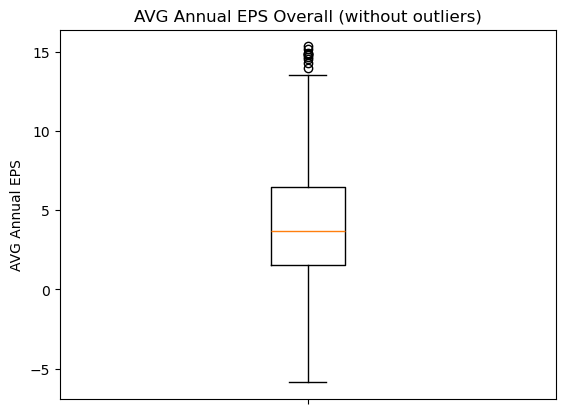

In [20]:
eps_series_wo_outliers= pd.DataFrame(eps_wo_outliers["AVG Annual EPS"])

# Create a boxplot for the data
plt.boxplot(eps_series_wo_outliers)

# Add labels to the x-axis
plt.xticks([1], [""])

# Add a title and labels
plt.title('AVG Annual EPS Overall (without outliers)')
plt.ylabel('AVG Annual EPS')

plt.savefig("Images/AVG Annual EPS Overall (without outliers)BOX.png")

# Show the plot
plt.show()

# Regression Analysis

In [21]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation is: {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    print(f"the p-value is : {pvalue}")
    plt.savefig(f"Images/{title}.png")
    plt.show()

The correlation is: 0.13
The r-squared is: 0.016472994981909513
the p-value is : 0.002659261255066375


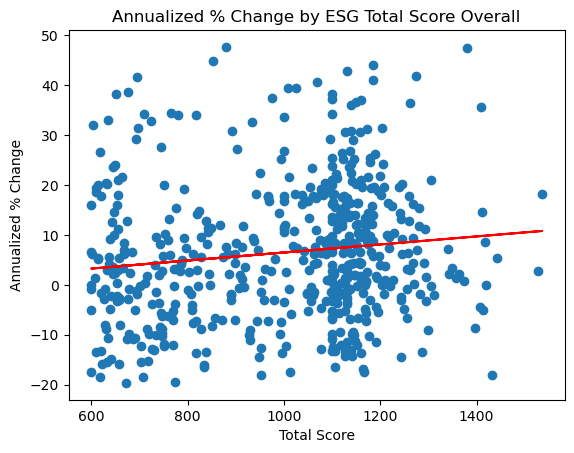

In [22]:
# Linear regression on Annualized % Change
plt.title("Annualized % Change by ESG Total Score Overall")
plt.xlabel("Total Score")
plt.ylabel("Annualized % Change") 

linear_regression(perc_change_wo_outliers["total_score"], \
                  perc_change_wo_outliers["Annualized % Change"],\
                  "Annualized % Change by ESG Total Score Overall" )

Looking at overall score and the Annualized % change we can determine that there is a weak positive correlation between the two. The p-value being less than .05 tells us that this statistical test disproves the null hypothesis. The r² values tell us that the relationship between the two variables.

The correlation is: 0.21
The r-squared is: 0.04247553464457232
the p-value is : 1.0891268150428286e-06


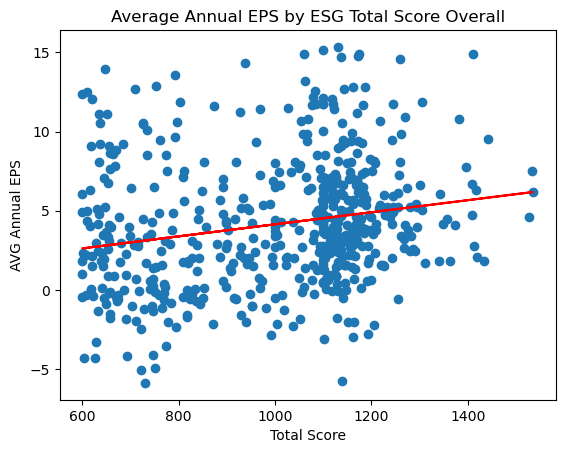

In [23]:
# Linear regression on AVG Annual EPS
plt.title("Average Annual EPS by ESG Total Score Overall")
plt.xlabel("Total Score")
plt.ylabel("AVG Annual EPS") 
linear_regression(eps_wo_outliers["total_score"], \
                  eps_wo_outliers["AVG Annual EPS"],\
                  "Average Annual EPS by ESG Total Score Overall")

Looking at overall score and the AVG annual EPS we can determine that there is a weak positive correlation between the two. The p-value being less than .05 tells us that this statistical test disproves the null hypothesis. The r² values tell us that the relationship between the two variables.

# Conclusion

From our analysis we have concluded that it would not be wise for investors to solely use ESG grade as their lone indicator when deciding on their investment choices. Investors can certainly take a companies ESG rating into account when selecting an investment but factors such as Dividend Payout Ratio, Overall Investment Need, Time Horizon of the investor, Risk factor of the investor, Volatility of the stock/sector, and the overall stock market environment need to be addressed in tandem with ESG grade when determining the viability of a stock for a particular investor.